<a href="https://colab.research.google.com/github/thoxinloi/ai/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cifar10

In [26]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

So nay la:[8]


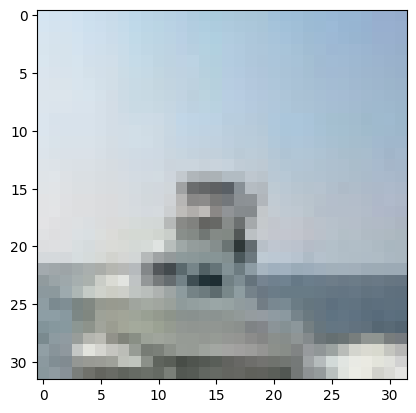

In [27]:
import matplotlib.pyplot as plt
hinh = x_train[100]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show
print('So nay la:{}' .format(y_train[100]))
     

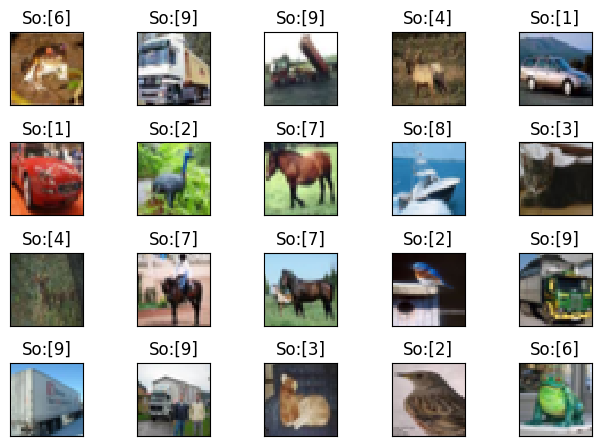

In [28]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title('So:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [29]:
from keras import models
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical 

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,), name='Lop1'))
model.add(Dense(10, activation='softmax', name='Lopra'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Lop1 (Dense)                (None, 512)               1573376   
                                                                 
 Lopra (Dense)               (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [30]:
x_train = x_train.reshape((50000, 32*32*3))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000, 32*32*3))
x_test = x_test.astype('float32')/255

from keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [31]:
model.compile(optimizer ='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 50, batch_size = 128)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Accurency', test_acc)
print('Loss', test_loss)

Epoch 1/50
391/391 [==============================] - 14s 32ms/step - loss: 2.1913 - accuracy: 0.2687
Epoch 2/50
391/391 [==============================] - 12s 32ms/step - loss: 1.8016 - accuracy: 0.3581
Epoch 3/50
391/391 [==============================] - 12s 31ms/step - loss: 1.7186 - accuracy: 0.3891
Epoch 4/50
391/391 [==============================] - 14s 35ms/step - loss: 1.6672 - accuracy: 0.4079
Epoch 5/50
391/391 [==============================] - 12s 32ms/step - loss: 1.6250 - accuracy: 0.4238
Epoch 6/50
391/391 [==============================] - 14s 36ms/step - loss: 1.5955 - accuracy: 0.4363
Epoch 7/50
391/391 [==============================] - 13s 33ms/step - loss: 1.5642 - accuracy: 0.4478
Epoch 8/50
391/391 [==============================] - 12s 31ms/step - loss: 1.5395 - accuracy: 0.4560
Epoch 9/50
391/391 [==============================] - 12s 31ms/step - loss: 1.5212 - accuracy: 0.4634
Epoch 10/50
391/391 [==============================] - 13s 33ms/step - loss: 1.500

In [32]:
model.save('cifar10.h5')

In [33]:
classes_keys = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 
                4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

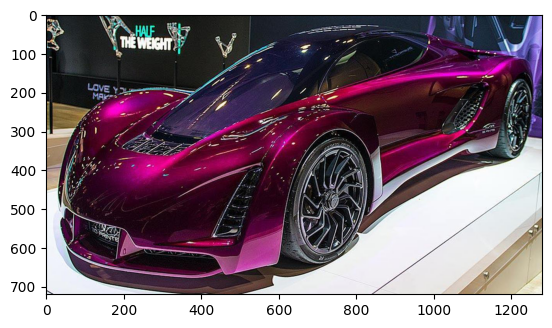

In [1]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np

from PIL import Image

url = 'automobile.jpg'
img = load_img(url)
plt.imshow(img)

NameError: ignored

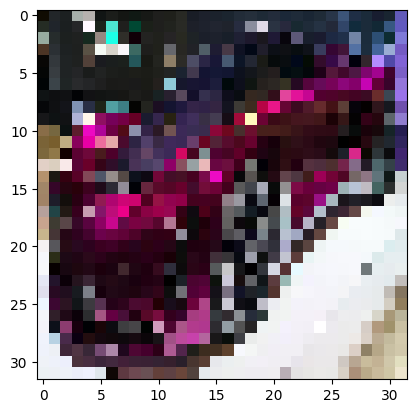

In [7]:
from keras.utils import load_img, img_to_array
import numpy as np
img = load_img(url, target_size=(32,32))
plt.imshow(img)

# From image to array to predict
img = img_to_array(img)
img = img.astype('float32')
img = img/255
pred_value=np.argmax(model.predict(img.reshape(1,32*32*3),verbose=False),)

# Check the class
for keys in classes_keys.keys():
  if pred_value == keys:
    plt.title(classes_keys[keys])
    break
  else:
    continue